In [41]:
import numpy as np
import MDAnalysis as mda
import matplotlib.pyplot as plt

rate_atom = np.loadtxt('rate_atom_DECT_ms0_ms1_2.0_1_1_0.80_20.txt')
n_atom = len(rate_atom)
# rate_atom *= n_atom / np.sum(rate_atom)  ## I believe this is the normalization for the residue score
u = mda.Universe('rate_atom_DECT_ms0_ms1_2.0_1_1_0.80_20_all.pdb')
ag_res = u.atoms.groupby('resids')
rate_atom_residuewise = np.zeros_like(rate_atom)
rate_res = np.zeros(len(ag_res))

for i_r, res in enumerate(ag_res):
    rate_this_res = np.average(rate_atom[[a.ix for a in ag_res[res]]])
    rate_atom_residuewise[[a.ix for a in ag_res[res]]] = rate_this_res
    rate_res[i_r] = rate_this_res

/home/crystal/miniconda3/envs/sinatra/lib/python3.6/site-packages/MDAnalysis/coordinates/PDB.py:429: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


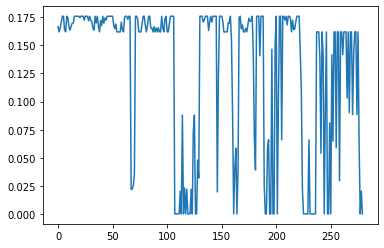

In [42]:
## output to a txt file if you want, or plot it
np.savetxt('rateres_ms0_ms1',rate_res)
plt.plot(range(0,279+1), rate_res)
plt.show()
## ...

In [55]:
## but to visualize on Chimera / VMD / PyMol
## append the residue-wise score onto a pdb file
u.add_TopologyAttr('tempfactors') # add empty attribute for all atoms
for residue, rate in zip(u.residues, rate_atom_residuewise):
    residue.atoms.tempfactors = rate
u.atoms.write('out.pdb')

In [32]:
rate_res

array([0.16666667, 0.16201878, 0.1658216 , 0.17073357, 0.17596244,
       0.17596244, 0.16356808, 0.16201878, 0.17596244, 0.17469483,
       0.16666667, 0.16356808, 0.16724765, 0.16976526, 0.16998659,
       0.17596244, 0.17596244, 0.17596244, 0.17596244, 0.17596244,
       0.17469483, 0.17596244, 0.17596244, 0.17596244, 0.17247652,
       0.17596244, 0.17596244, 0.17596244, 0.17197854, 0.17596244,
       0.17197854, 0.17131455, 0.1655047 , 0.16356808, 0.17596244,
       0.16998659, 0.17596244, 0.16724765, 0.16201878, 0.17197854,
       0.16759624, 0.17596244, 0.16976526, 0.17441314, 0.17247652,
       0.17596244, 0.17596244, 0.17596244, 0.17596244, 0.17596244,
       0.17596244, 0.16821596, 0.16480751, 0.16899061, 0.16201878,
       0.16201878, 0.16201878, 0.16201878, 0.17073357, 0.16356808,
       0.16201878, 0.17480047, 0.17596244, 0.17596244, 0.17317371,
       0.17596244, 0.17596244, 0.0219953 , 0.0219953 , 0.02513749,
       0.03519249, 0.17596244, 0.17596244, 0.17342723, 0.16201

In [33]:
rate_atom

array([0.16201878, 0.16201878, 0.17596244, ..., 0.16201878, 0.        ,
       0.        ])

In [48]:
# Open a text file in write mode
with open("numbers.txt", "w") as file:
    # Write numbers from 0 to 279, separated by spaces
    for i in range(280):
        file.write(str(i) + " ")